# RandomForest

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('../dataset/master_3.csv')

In [2]:
X = data[data.columns.difference(['outcome_critical','intime','outtime','ed_los','outcome_icu_transfer_12h'])]
y = data['outcome_critical']

In [3]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022) # 80% training and 20% test

## depth에 따른 최적화 찾기

In [4]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)            # Desired number of Cross Validation folds  #n_splits값이 클수록 오래걸림
accuracies = list()
max_attributes = X_test.shape[1]
depth_range = range(1, max_attributes)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    rand_clf = RandomForestClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    #for train_fold, valid_fold in cv.split(data):
     #   f_train = data.loc[train_fold] # Extract train data with cv indices
      #  f_valid = data.loc[valid_fold] # Extract valid data with cv indices

    model = rand_clf.fit(X_train, y_train)        
    valid_acc = model.score(X_test, y_test)        
    fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

In [4]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=2022)

rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)

print('훈련세트 정확도: {:.3f}' .format(rand_clf.score(X_train, y_train)))
print('테스트세트 정확도: {:.3f}' .format(rand_clf.score(X_test, y_test)))

훈련세트 정확도: 1.000
테스트세트 정확도: 0.957


In [5]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[83542   357]
 [ 3516  2380]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     83899
        True       0.87      0.40      0.55      5896

    accuracy                           0.96     89795
   macro avg       0.91      0.70      0.76     89795
weighted avg       0.95      0.96      0.95     89795



Feature importances:
[0.032 0.    0.002 0.002 0.001 0.002 0.001 0.001 0.    0.001 0.001 0.002
 0.001 0.001 0.001 0.002 0.002 0.001 0.002 0.002 0.001 0.003 0.001 0.001
 0.001 0.002 0.001 0.    0.001 0.002 0.001 0.002 0.001 0.002 0.002 0.001
 0.002 0.002 0.001 0.003 0.    0.002 0.003 0.002 0.001 0.    0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.027 0.    0.04  0.13  0.015 0.01  0.041 0.029 0.024 0.005 0.023 0.025
 0.002 0.007 0.004 0.002 0.006 0.004 0.002 0.006 0.003 0.033 0.022 0.001
 0.086 0.066 0.024 0.024 0.05  0.027 0.031 0.021 0.022 0.017 0.035 0.024]
age : 0.032
before_ed_mortality : 0.000
cci_CHF : 0.002
cci_Cancer1 : 0.002
cci_Cancer2 : 0.001
cci_DM1 : 0.002
cci_DM2 : 0.001
cci_Dementia : 0.001
cci_HIV : 0.000
cci_Liver1 : 0.001
cci_Liver2 : 0.001
cci_MI : 0.002
cci_PUD : 0.001
cci_PVD : 0.001
cci_Paralysis : 0.001
cci_Pulmonary : 0.002
cci_Renal : 0.002
cci_Rheumatic : 0.001
cci_Stroke : 0.002
chiefcom_abdominal_pain : 0.002
chiefcom_

<AxesSubplot:>

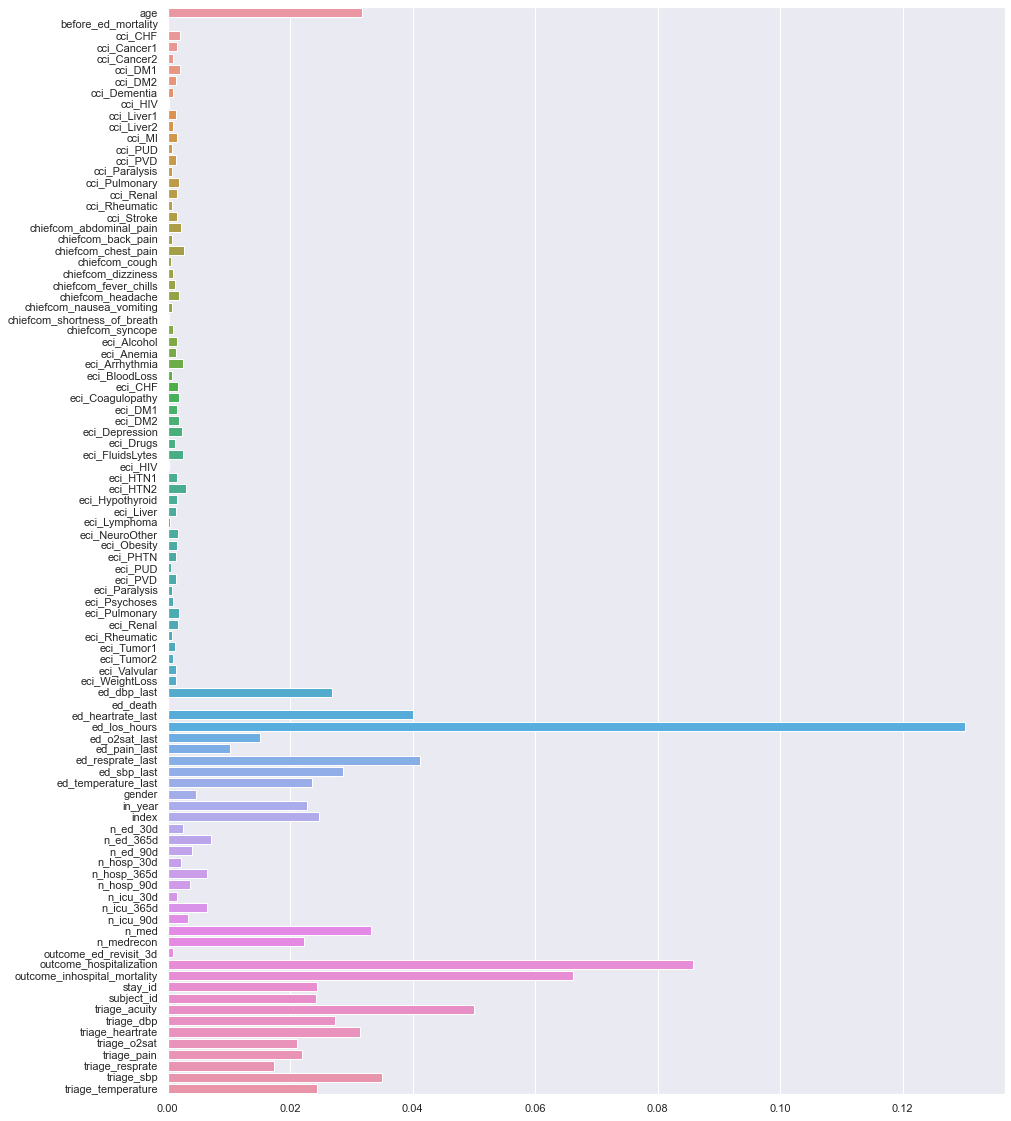

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(rand_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(X.columns , rand_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.set(rc = {'figure.figsize':(15,20)})
sns.barplot(x=rand_clf.feature_importances_ , y=X.columns)